
# Банк - анализ.

## Подключение данных  

In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

churn_df = pd.read_csv('data/churn.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Подготовка данных

In [2]:
#churn_df.drop(['RowNumber'],axis=1,inplace=True)
display(churn_df.head())
display(churn_df.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

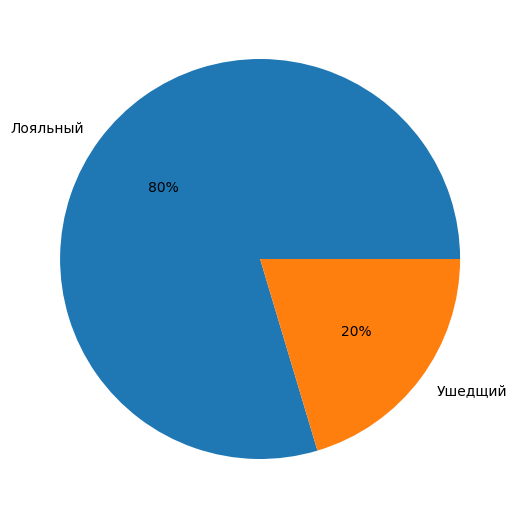

In [22]:
#Подготовка данных для визуализации 
tlb_1 = churn_df.groupby(by='Exited',as_index=False)['CustomerId'].count()
tlb_1['Description'] = tlb_1['Exited'].apply(lambda x: 'Лояльный' if x == 0 else "Ушедщий")
#display(tlb_1)

#Визуализации
fig = plt.figure(figsize=(5, 5))
axes_1 = fig.add_axes([0, 0, 1, 1])
axes_1.pie(
    tlb_1['CustomerId'],
    labels=tlb_1['Description'],
    autopct='%.0f%%'
);

Ушедших клиентов в 4 раза меньше чем лояльных. У банка подавляющие большинство лояльный клиентов

## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

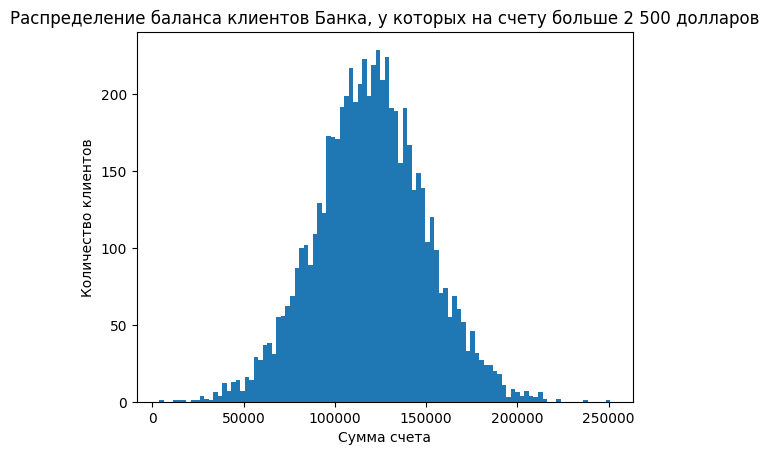

In [23]:
#Подготовка данных для визуализации 
tlb_2 = churn_df[churn_df['Balance'] > 2500]
#display(tlb_2)

#Визуализации
plt.title('Распределение баланса клиентов Банка, у которых на счету больше 2 500 долларов')
plt.xlabel('Сумма счета')
plt.ylabel('Количество клиентов')
plt.hist(
    tlb_2['Balance'], 
    bins = 100
);


По распределение баланса пользователей, у которых на счету больше 2 500 долларов видно, что осноными клиенты банка являться предствавители средненого класса.

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

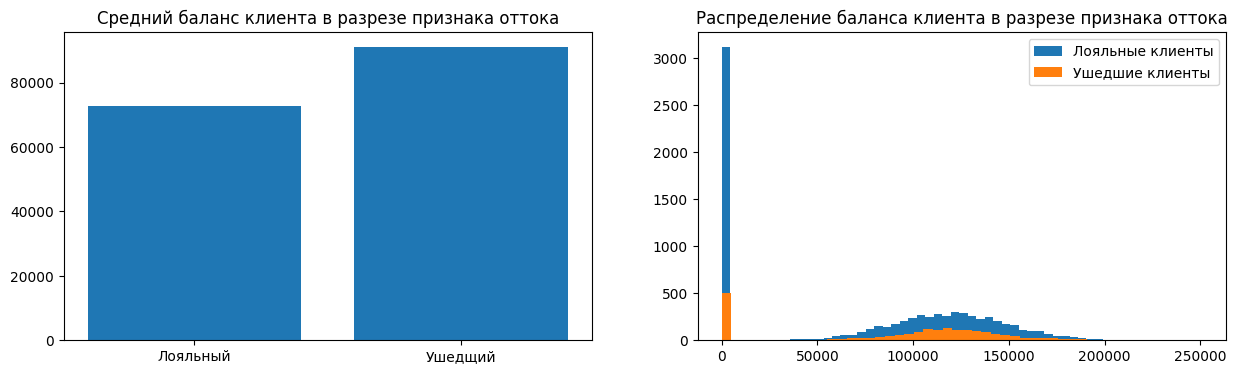

In [24]:
#Подготовка данных для визуализации 
tbl_3 = churn_df[(churn_df['Exited'] == 0)]
tbl_4 = churn_df[(churn_df['Exited'] == 1)]
tbl_5 = churn_df.groupby(['Exited'],as_index=False)['Balance'].mean()
tbl_5['Description'] = tbl_5['Exited'].apply(lambda x: 'Лояльный' if x == 0 else "Ушедщий")

#display(tbl_3)
#display(tbl_4)
#display(tbl_5)

#Визуализации
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[1].hist(
    tbl_3['Balance'], 
    label='Лояльные клиенты',
    bins=50
);
axes[1].hist(
    tbl_4['Balance'], 
    label='Ушедшие клиенты',
    bins=50
);
axes[1].legend()
axes[1].set_title("Распределение баланса клиента в разрезе признака оттока");

axes[0].bar(
    x = tbl_5['Description'], 
    height = tbl_5['Balance']);
axes[0].set_title("Средний баланс клиента в разрезе признака оттока");

Связь распределение баланса клиента в разрезе признака оттока не выявлена. Несмотря на то, средний баланс у ушедших клиентов немного больше, это больше похожу на ошибку данных. На втором графике каких то отклонений по балансу клиента в разрезе признака оттока не видна. Присуствует много нулевых балансов у лояльных клиентов. По первому заданию мы знаем что лояльных клиентов в 4 раза больше ушедшишь, при это нулевых балансов у лояльных клиентов в 6 раз больше. Возможно из-за этого и получилась разница в средних значения баланса в размере 15%. 

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

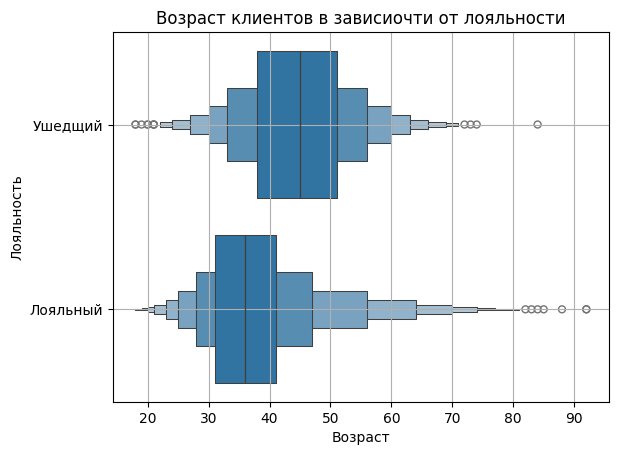

In [25]:
#Подготовка данных для визуализации 
tbl_6 =churn_df
tbl_6['Description'] = churn_df['Exited'].apply(lambda x: 'Лояльный' if x == 0 else "Ушедщий")

#display(tbl_6)

#Визуализации
x = sns.boxenplot(
    data = tbl_6,
    y = tbl_6['Description'],
    x = tbl_6['Age'],
    orient = 'h'
)
x.set_title('Возраст клиентов в зависиочти от лояльности');
x.set_xlabel('Возраст');
x.set_ylabel('Лояльность');
x.grid()

По коробчатой диаграмме видно, что ушедшие клиенты старше лояльных на 8-10 лет. Банку необходимо обратить внимание на возрастную группу от 37 до 52 лет. В этой группе самое большое количество ушедших клиентов.

## 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

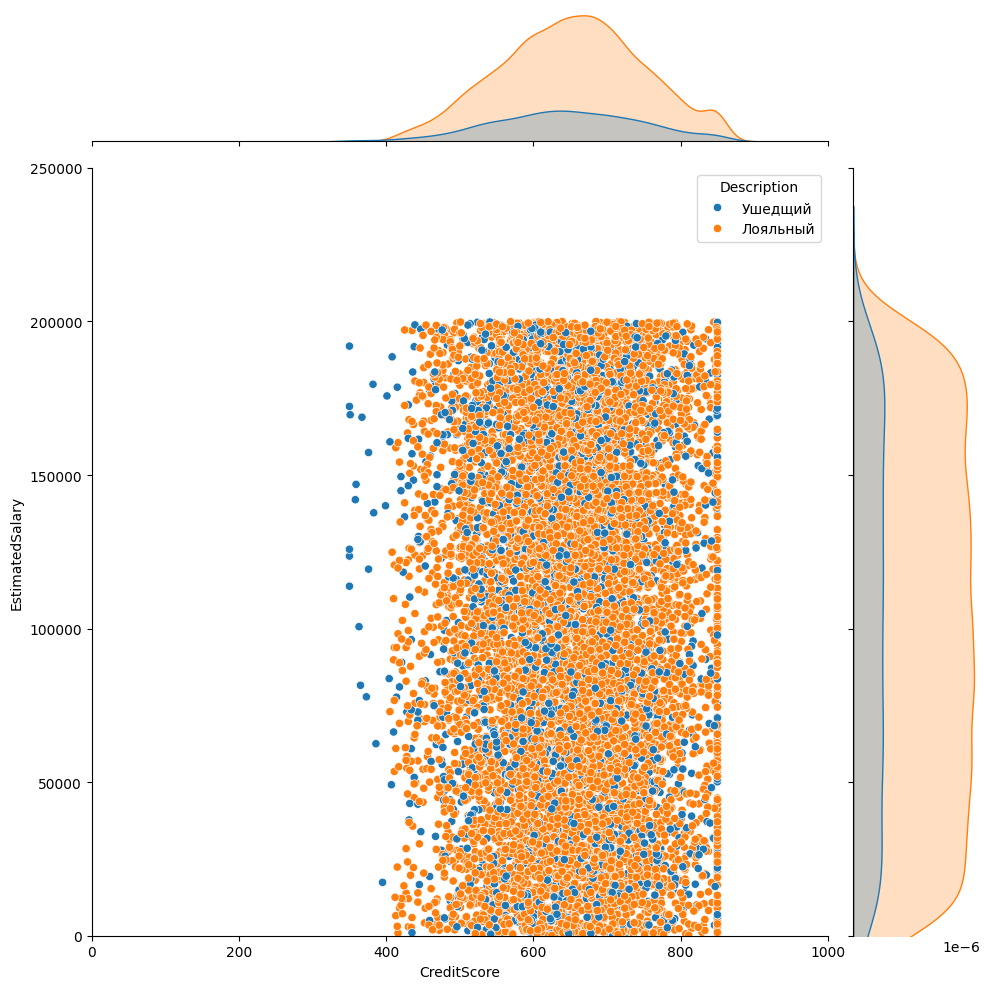

In [26]:
#Подготовка данных для визуализации 
tbl_7 =churn_df
tbl_7['Description'] = churn_df['Exited'].apply(lambda x: 'Лояльный' if x == 0 else "Ушедщий")

#Визуализации
jointplot = sns.jointplot(
    tbl_7, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Description',
    xlim = (0, 1000),
    ylim = (0, 250000),
    height=10
);

Взаимосвязь кредитного рейтинга клиента к его предполагаемой зарплаты, в разрезе лояльности не выявлено. Имееться смещение клиентов с низким рейтингом, менее 400 единиц в сторону ушдних клиентов, но каких клиентов мало на общем фоне 

## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

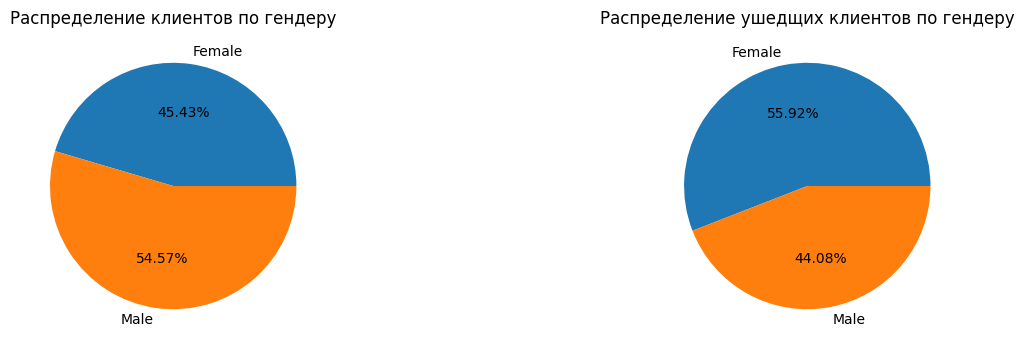

In [54]:
#Подготовка данных для визуализации 
tbl_8 = churn_df.groupby(['Gender'],as_index=False)['CustomerId'].count()
tbl_9 = churn_df[(churn_df['Exited'] == 1)]
tbl_9 = tbl_9.groupby(['Gender'],as_index=False)['CustomerId'].count()
#display(tbl_8)
#display(tbl_9)

#Визуализации
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].pie(
    tbl_8['CustomerId'],
    labels=tbl_8['Gender'],
    autopct='%.2f%%'
);
axes[0].set_title("Распределение клиентов по гендеру");

axes[1].pie(
    tbl_9['CustomerId'],
    labels=tbl_9['Gender'],
    autopct='%.2f%%'
);
axes[1].set_title("Распределение ушедщих клиентов по гендеру");


По второму графику видно что, из банка уходит больше женщин на 12 процентов. При условии что женщин клиентов в банке на 10 процентов меньше мужчин, признак ушедших по генднру становиться еще более значемым. 

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

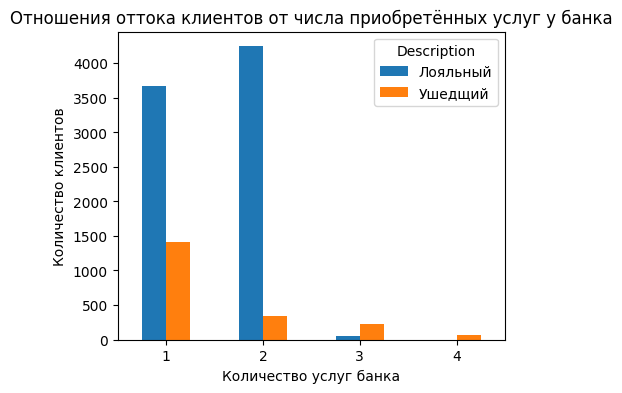

In [51]:
#Подготовка данных для визуализации 
tbl_10 = churn_df
tbl_10['Description'] = churn_df['Exited'].apply(lambda x: 'Лояльный' if x == 0 else "Ушедщий")
tbl_10 = churn_df.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Description',
    aggfunc='count'
)
tbl_10 = tbl_10.fillna(0)
#display(tbl_10)
#display(tbl_10.info())

#Визуализации
fig, axes = plt.subplots(figsize=(5,4))
tbl_10.plot(
    kind='bar',
    ax=axes
);
axes.xaxis.set_tick_params(rotation=360)
axes.set_title('Отношения оттока клиентов от числа приобретённых услуг у банка');
axes.set_xlabel('Количество услуг банка');
axes.set_ylabel('Количество клиентов');


Сомае большое отношение ушедших клиентов наблюдаеться в сегменте трех четыреч услуг. Где ушедшие киенты превышают лоялных. С учетом того, что в этот сегменте не такое уж и большое количество клиентов 3-4 процента, то можно понят, что в банке отсуствует больное рзнобразие конрурентных продуктов. Сомые эфективные показатели у двух продуктового сегмена, отношение уедших клиентов к лояльные самое мизирное. Тасже стоит обратить внимание на одно продуктовый сегмент где ушедших клиетов 30 процентов от лоялный при условии что это не самый большой сенгмент. Это говорит о том что новые клиенты не дольго задерживаются в банке и не расширяют пользования услугами.  

## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

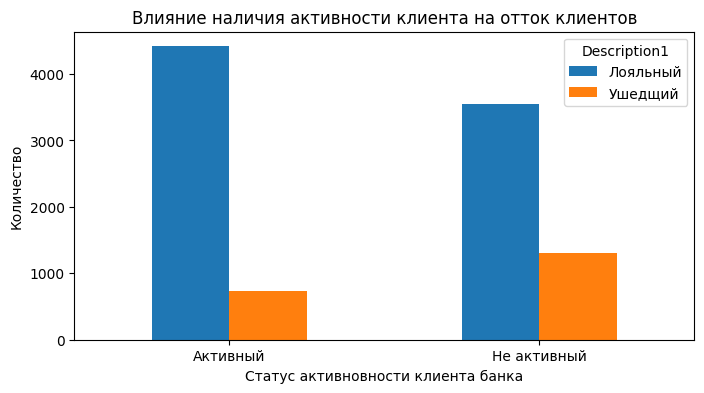

In [40]:
#Подготовка данных для визуализации 
tbl_11 = churn_df
tbl_11['Description1'] = churn_df['Exited'].apply(lambda x: 'Лояльный' if x == 0 else "Ушедщий")
tbl_11['Description2'] = churn_df['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else "Не активный")
tbl_11 = tbl_11.pivot_table(
    'CustomerId',
    index='Description2',
    columns='Description1',
    aggfunc='count'
)

#display(tbl_11)

#Визуализации
fig, axes = plt.subplots(figsize=(8,4))
tbl_11.plot(
    kind='bar',
    ax=axes
);
axes.set_title('Влияние наличия активности клиента на отток клиентов');
axes.set_xlabel('Cтатус активновности клиента банка');
axes.set_ylabel('Количество');
axes.xaxis.set_tick_params(rotation=360);



Не активные клиенты уходили в 2 раза чаще чем активные. Рекомендуеться провести допольнительный анализ по антивным рознечным продуктам.

## 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

C:\Users\Nikolas Shirikin\AppData\Local\Temp\ipykernel_15200\3524100787.py:12: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



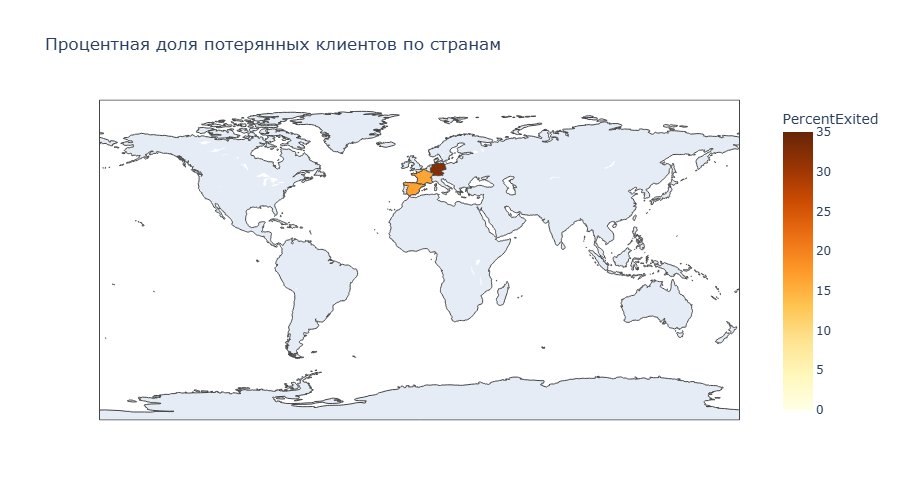

In [24]:
#Подготовка данных для визуализации 
tbl_12 = churn_df
tbl_13 = churn_df
tbl_12 = tbl_12.groupby(by='Geography')['CustomerId'].count()
tbl_13 = tbl_13[tbl_13['Exited'] == 1].groupby(by='Geography')['CustomerId'].count() 
tbl_14 = pd.concat([tbl_12, tbl_13], axis=1, keys=['CustomerAll', 'CustomerExited'])
tbl_14['PercentExited'] = round(tbl_14['CustomerExited'] * 100 / tbl_14['CustomerAll'], 2)

#display(tbl_14)

#Визуализации
fig = px.choropleth(
    data_frame=tbl_14, 
    locations=tbl_14.index, 
    locationmode = "country names", 
    color= 'PercentExited', 
    range_color=[0, 35], 
    title='Процентная доля потерянных клиентов по странам', 
    height=500,
    width=900,
    color_continuous_scale='YlOrBr'
);
fig.show("png");



По графику видно, что в Германии процент ушедщих клиентов 2 раза больше чем во Франции и Испании. Вариантов можент быть много политических, экономических, рботы конрурентных банков. Ситуация в Германии тербует более гркбокогоисселования. Рекомендовано заказать исследование банского рынка в Германии. 

## 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


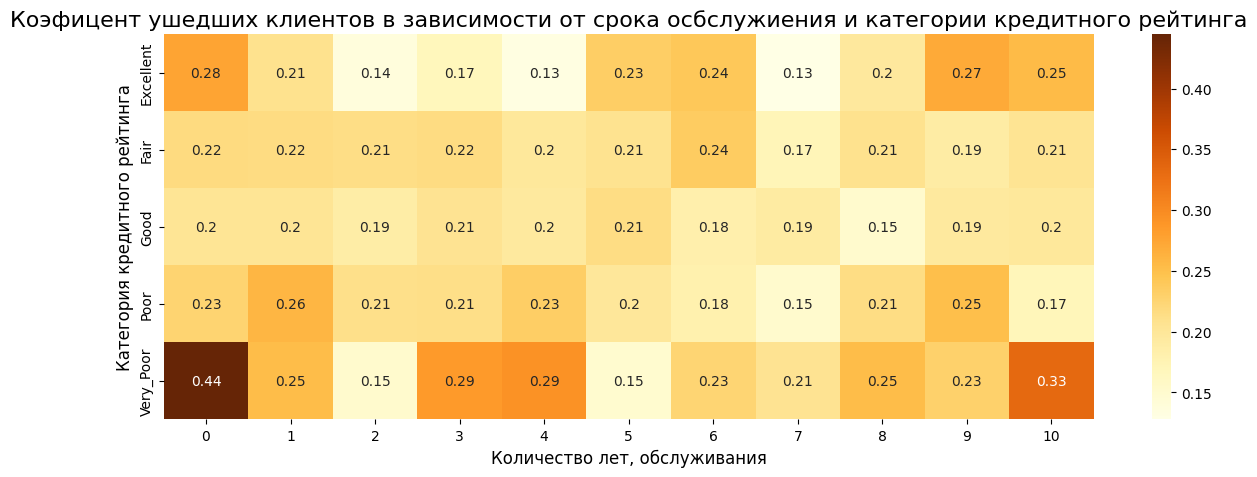

In [31]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

#Подготовка данных для визуализации    
tbl_15 = churn_df
tbl_15['CreditScoreCat'] = tbl_15['CreditScore'].apply(get_credit_score_cat)
tbl_15 = tbl_15.pivot_table(
    values= 'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc= 'mean',
)

display(tbl_15)  

#Визуализации
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(
    data=tbl_15, 
    cmap='YlOrBr', 
    annot=True
)
heatmap.set_title('Коэфицент ушедших клиентов в зависимости от срока осбслужиения и категории кредитного рейтинга', fontsize=16);
heatmap.set_xlabel('Количество лет, обслуживания', fontsize=12);
heatmap.set_ylabel('Категория кредитного рейтинга', fontsize=12);
    

Very_Pool кредитная категория из которой чаще всего уходят клиенты банка. 